In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [27]:
# 데이터 로드
df = pd.read_csv("D:/seeds.csv")
df

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [28]:
# 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum()) 


결측치 확인:
15.26    0
14.84    0
0.871    0
5.763    0
3.312    0
2.221    0
5.22     0
1        0
dtype: int64



imbalanced data 확인:


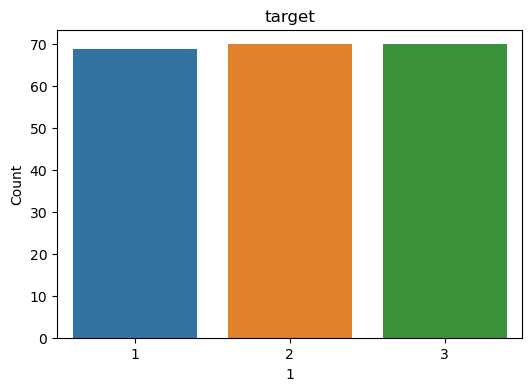

In [29]:
# 레이블 개수 확인(imbalanced data) - 그래프
print("\nimbalanced data 확인:")
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

sns.countplot(data = df, x="1")
plt.xlabel("1")
plt.ylabel("Count")
plt.title("target")
plt.show()

In [31]:
# 입력값과 타겟 분리
X = df.iloc[:, :-1].values
X

array([[14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955, ...,  3.379 ,  2.259 ,  4.805 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [37]:
# 입력값과 타겟 분리
y = df.iloc[:, -1].values -1  # 레이블 0,1,2로 변환
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [46]:
# 레이블 확인 - 숫자
print("\n레이블 개수 확인:")
df['1'].value_counts()


레이블 개수 확인:


2    70
3    70
1    69
Name: 1, dtype: int64

In [38]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.0118402 ,  0.00923364,  0.42749407, ...,  0.19764747,
        -1.79278662, -0.9219711 ],
       [-0.19093968, -0.35835326,  1.43894519, ...,  0.20823799,
        -0.67216102, -1.18860657],
       [-0.3456023 , -0.47322416,  1.03690395, ...,  0.31943844,
        -0.9654836 , -1.22931428],
       ...,
       [-0.56556692, -0.68764985,  0.73219901, ..., -0.06976315,
         3.07170181, -0.71843257],
       [-1.03299173, -1.03226257, -0.79978973, ..., -1.11822457,
        -0.07284964, -0.7428572 ],
       [-0.87489216, -0.93270779, -0.10997159, ..., -0.75285165,
         1.28643389, -0.70418488]])

In [39]:
# 원-핫 인코딩
y = to_categorical(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [40]:
# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((167, 7), (42, 7), (167, 3), (42, 3))

In [41]:
# Model 1: Sequential 모델 (add()로 레이어 추가)

# Sequential 모델 정의
model1 = Sequential()
model1.add(Dense(units=32, input_shape=(X.shape[1],), activation='sigmoid'))
model1.add(Dense(units=3, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, validation_split=0.2)

# 예측 및 평가
y_pred_prob = model1.predict(X_test)
y_pred_class = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print("Sequential Model Accuracy:", np.mean(y_test_class == y_pred_class))
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

Epoch 1/50


C:\Users\tjdus\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3697 - loss: 1.2227 - val_accuracy: 0.2647 - val_loss: 1.3110
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3701 - loss: 1.1565 - val_accuracy: 0.2647 - val_loss: 1.2281
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3818 - loss: 1.0927 - val_accuracy: 0.2647 - val_loss: 1.1523
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3571 - loss: 1.0488 - val_accuracy: 0.2647 - val_loss: 1.0859
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3942 - loss: 0.9910 - val_accuracy: 0.2941 - val_loss: 1.0265
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4513 - loss: 0.9408 - val_accuracy: 0.3235 - val_loss: 0.9736
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4703 - loss: 0.9147 - val_accuracy: 0.4706 - val_loss: 0.9280
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5771 - loss: 0.8730 - val_accuracy: 0.5882 - val_loss: 0.8891
Epoch 9/50

[[ 9  0  1]
 [ 0 15  0]
 [ 2  0 15]]


In [44]:
# Model 2: 함수형 API

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Functional API 모델 정의
inputs = Input(shape=(X.shape[1],))
x = Dense(32, activation='sigmoid')(inputs)
outputs = Dense(3, activation='softmax')(x)
model2 = Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, validation_split=0.2)

# 예측 및 평가
y_pred_prob = model2.predict(X_test)
y_pred_class = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print("Functional API Model Accuracy:", np.mean(y_test_class == y_pred_class))
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.3158 - loss: 1.2855 - val_accuracy: 0.3824 - val_loss: 1.2388
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3492 - loss: 1.1995 - val_accuracy: 0.3824 - val_loss: 1.1797
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3313 - loss: 1.1428 - val_accuracy: 0.3824 - val_loss: 1.1303
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3865 - loss: 1.1006 - val_accuracy: 0.4412 - val_loss: 1.0843
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5166 - loss: 1.0269 - val_accuracy: 0.5294 - val_loss: 1.0411
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5646 - loss: 1.0146 - val_accuracy: 0.5882 - val_loss: 0.9996
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6460 - loss: 0.9826 - val_accuracy: 0.6176 - val_loss: 0.9639
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6508 - loss: 0.9301 - val_accuracy: 0.6471 - val_loss: 0.9344

In [45]:
# Model 3: Model 클래스 상속

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class SimpleMLP(Model):
    def __init__(self, num_classes):
        super(SimpleMLP, self).__init__()
        self.dense1 = Dense(32, activation='sigmoid')
        self.dense2 = Dense(num_classes, activation='softmax')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

model3 = SimpleMLP(num_classes=3)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=50, validation_split=0.2)

# 예측 및 평가
y_pred_prob = model3.predict(X_test)
y_pred_class = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print("Subclassed Model Accuracy:", np.mean(y_test_class == y_pred_class))
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.3310 - loss: 1.0710 - val_accuracy: 0.3235 - val_loss: 1.0512
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4572 - loss: 1.0178 - val_accuracy: 0.4706 - val_loss: 1.0144
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5102 - loss: 0.9972 - val_accuracy: 0.5000 - val_loss: 0.9780
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6585 - loss: 0.9554 - val_accuracy: 0.5882 - val_loss: 0.9480
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6875 - loss: 0.9316 - val_accuracy: 0.6765 - val_loss: 0.9176
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7578 - loss: 0.9050 - val_accuracy: 0.7647 - val_loss: 0.8888
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7849 - loss: 0.8884 - val_accuracy: 0.8824 - val_loss: 0.8595
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8408 - loss: 0.8606 - val_accuracy: 0.9706 - val_loss: 0.8329

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DE713E8280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Subclassed Model Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      1.00      1.00 